In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
path = r"C:\Users\VISION\Downloads\Salary_dataset.csv"
salary_dataset = pd.read_csv(path)

In [12]:
salary_dataset.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


# Adding Bias Term (x0 = 1) for Linear Regression

In [19]:
salary_dataset['Unnamed: 0'] = 1
salary_dataset.rename(columns ={'Unnamed: 0' : 'x0'} , inplace = True)

In [41]:
# Round numeric columns and convert to integer type
salary_dataset['YearsExperience'] = salary_dataset['YearsExperience'].round()
salary_dataset['Salary'] = salary_dataset['Salary'].round().astype(int)
salary_dataset

,x0,YearsExperience,Salary
0,1,1.0,39344
1,1,1.0,46206
2,1,2.0,37732
3,1,2.0,43526
4,1,2.0,39892
5,1,3.0,56643
6,1,3.0,60151
7,1,3.0,54446
8,1,3.0,64446
9,1,4.0,57190


In [21]:
salary_dataset.describe()

,x0,YearsExperience,Salary
count,30.0,30.000000,30.000000
mean,1.0,5.366667,76004.000000
std,0.0,2.918234,27414.429785
min,1.0,1.000000,37732.000000
25%,1.0,3.000000,56721.750000
50%,1.0,5.000000,65238.000000
75%,1.0,7.750000,100545.750000
max,1.0,11.000000,122392.000000


# define x and y to tarin the model

In [26]:
x = salary_dataset.drop('Salary', axis = 1)
y = salary_dataset['Salary']

# cols = salary_dataset.shape[1]
# x =salary_dataset.iloc[ : ,0 :cols-1]
# y =salary_dataset.iloc[ : ,cols-1 :cols]

In [28]:
# Convert to matrix and define theta
x = np.matrix(x.values)
y = np.matrix(y.values) 
theta = np.matrix(np.array([0,0]))

# calc the cost of the model with theta [0,0]

In [29]:
def computeCost(x , y , theta):
    z = np.power(((x * theta.T)- y), 2)
    return np.sum(z) / (2 * len(x))
print("cost = ", computeCost(x , y , theta))

cost =  3251553638.866667


# Use Gradient Descent to calculate optimal theta and minimize the cost function

In [30]:
def computeGradient(x , y , theta , alpha , iteras):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[1]) # parameters = 2 
    cost = np.zeros(iteras)
    
    for i in range (iteras):
        error = x * theta.T- y
        
        for j in range (parameters):
            term = np.multiply(error ,x[ : ,j])
            temp[0,j] = theta[0,j]- ((alpha / len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(x , y , theta)
    return theta , cost

alpha = .01
iteras = 1000

g , cost = computeGradient(x , y , theta , alpha , iteras)
print('g = ', g)
print('cost = ', cost[0:50])
print('computeCost = ',computeCost(x , y , g))
    

g =  [[24280.77857153  9521.8880208 ]]
cost =  [1.31408717e+09 5.64701214e+08 2.74734297e+08 1.62420697e+08
 1.18804575e+08 1.01753850e+08 9.49764893e+07 9.21725300e+07
 9.09058403e+07 9.02343898e+07 8.97939021e+07 8.94435118e+07
 8.91287443e+07 8.88285314e+07 8.85347230e+07 8.82441640e+07
 8.79556311e+07 8.76686479e+07 8.73830268e+07 8.70986920e+07
 8.68156108e+07 8.65337674e+07 8.62531524e+07 8.59737587e+07
 8.56955806e+07 8.54186124e+07 8.51428489e+07 8.48682847e+07
 8.45949146e+07 8.43227335e+07 8.40517361e+07 8.37819173e+07
 8.35132720e+07 8.32457951e+07 8.29794815e+07 8.27143261e+07
 8.24503239e+07 8.21874699e+07 8.19257590e+07 8.16651864e+07
 8.14057471e+07 8.11474360e+07 8.08902485e+07 8.06341794e+07
 8.03792240e+07 8.01253775e+07 7.98726350e+07 7.96209917e+07
 7.93704428e+07 7.91209836e+07]
computeCost =  22920774.038905185


In [32]:
x = np.linspace(salary_dataset.YearsExperience.min(), salary_dataset.YearsExperience.max(), 100) # generate 100 point 
f = g[0,0] + (g[0,1]* x) # Prediction equation h(X)
print('F = ', f)

F =  [ 33802.66659233  34764.47346311  35726.2803339   36688.08720469
  37649.89407548  38611.70094627  39573.50781705  40535.31468784
  41497.12155863  42458.92842942  43420.7353002   44382.54217099
  45344.34904178  46306.15591257  47267.96278335  48229.76965414
  49191.57652493  50153.38339572  51115.1902665   52076.99713729
  53038.80400808  54000.61087887  54962.41774965  55924.22462044
  56886.03149123  57847.83836202  58809.6452328   59771.45210359
  60733.25897438  61695.06584517  62656.87271595  63618.67958674
  64580.48645753  65542.29332832  66504.1001991   67465.90706989
  68427.71394068  69389.52081147  70351.32768225  71313.13455304
  72274.94142383  73236.74829462  74198.5551654   75160.36203619
  76122.16890698  77083.97577777  78045.78264855  79007.58951934
  79969.39639013  80931.20326092  81893.0101317   82854.81700249
  83816.62387328  84778.43074407  85740.23761486  86702.04448564
  87663.85135643  88625.65822722  89587.46509801  90549.27196879
  91511.07883958  92

Text(0.5, 1.0, ' Prediction of salary')

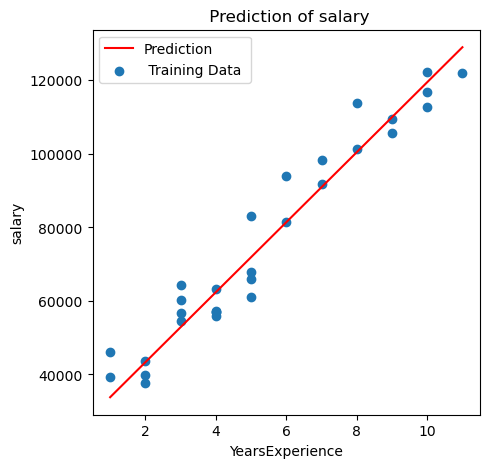

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, f, 'r', label='Prediction')
ax .scatter(salary_dataset.YearsExperience, salary_dataset.Salary, label= " Training Data ")
ax.legend(loc=2)  
ax .set_xlabel('YearsExperience')
ax .set_ylabel('salary')
ax .set_title(' Prediction of salary')

Text(0.5, 1.0, 'Error vs traning epocs')

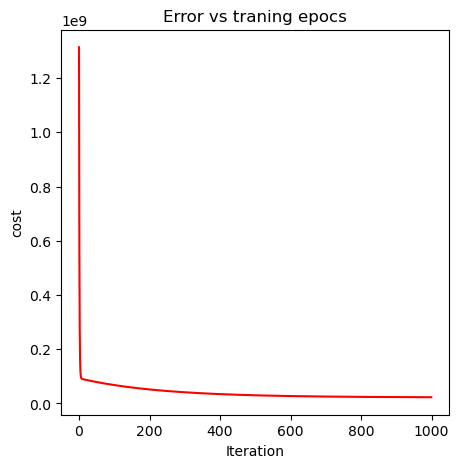

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(iteras), cost, 'r')
ax .set_xlabel('Iteration')
ax .set_ylabel('cost')
ax .set_title('Error vs traning epocs')